<a href="https://colab.research.google.com/github/Kaushikkatariya/DS_Assignment/blob/main/DS_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from all the sheets
dataframe_sales_codes = pd.read_excel("vehicle_data.xlsx", sheet_name="sales_codes")
dataframe_vehicle_hash = pd.read_excel("vehicle_data.xlsx", sheet_name="vehicle_hash")
dataframe_engines = pd.read_excel("vehicle_data.xlsx", sheet_name="engines")
print(dataframe_sales_codes.shape)
print(dataframe_vehicle_hash.shape)
print(dataframe_engines.shape)

(500, 5)
(500, 5)
(9, 7)


In [3]:
#Data type
dataframe_sales_codes.dtypes

Unnamed: 0           int64
h_vehicle_hash      object
production_date     object
country             object
sales_code_array    object
dtype: object

In [4]:
#Read sales code data from the sheets
dataframe_sales_codes.head(10)

,Unnamed: 0,h_vehicle_hash,production_date,country,sales_code_array
0,0,924d229bede272c5a3b440c464cd1dfb74cae74d,2013-02-05 00:00:00,Namibia,"Z5E, M3E, A4S, Y1R, F5E, J3Y, X4M, J1Z, M5X, V..."
1,0,3787a8db036dabd7433a32eaeeca8e5758bc3df8,2012-08-27 00:00:00,Germany,"Z5D, M2N, K1X, Q2Z, G0W, F0S, F0K, E4M, V2H, A..."
2,0,aea31cdf4f575acf190626a50e927547e683d2ac,2015-08-11 00:00:00,Germany,"Z5C, M2A, A5H, P7S, P2B, N8D, D4S, A3A, D4Q, I..."
3,0,d92ed338496281e08443c88583be06128a2d4b42,2015-02-22 00:00:00,Lithuania,"Z5F, M3P, D3H, C8C, Z9I, K6T, N2F, I1P, K3Z, Z..."
4,0,7934c4872515da4b1c9648d01c0813f81c496aff,2017-03-10 00:00:00,Germany,"Z5B, M1K, L1T, E6J, C6I, A2K, O0C, K1X, X1S, F..."
5,0,14099ecd0625030ad276cf651a9ce9c34ca50088,2020-06-14 00:00:00,United Arab Emirates / Dubai,"Z5F, M3P, Z2Q, W1Z, I4E, K8X, V5W, R5N, W4C, U..."
6,0,31af1c9e3162b07c36234b181aa44ca2a045b629,2016-11-24 00:00:00,French Guiana,"Z5B, M1H, W5U, C0U, M8C, C1M, W9I, P6Z, R6U, P..."
7,0,79313aefe4936c52ffba6a0dabdef2bcd0a69c21,2016-09-26 00:00:00,Malediven,"Z5D, M2Q, K6Q, J1Y, U2G, N1Q, Q0H, J3Q, O4G, M..."
8,0,5b15f251639c1ff25ca15e9c2ec570bef949000f,2018-09-06 00:00:00,Oman,"Z5E, M3B, J3Q, E2M, P2Q, F1R, K1T, C4V, W8B, Z..."
9,0,70d85da3bc330c69b31efcb70e486cdb8e6ac547,2018-04-01 00:00:00,Dominica,"Z5B, M1H, J2E, G0N, N2R, C9H, K3V, U3M, W0M, S..."


In [5]:
#count null data
dataframe_sales_codes.isnull().sum()

Unnamed: 0           0
h_vehicle_hash       5
production_date      3
country             10
sales_code_array     0
dtype: int64

In [7]:
dataframe_vehicle_hash.head(10)

,Unnamed: 0,h_vehicle_hash,fin,record_source,load_ts
0,0,924d229bede272c5a3b440c464cd1dfb74cae74d,WEB14561113188001,vedoc,2021-11-26 12:22:39.105133
1,0,3787a8db036dabd7433a32eaeeca8e5758bc3df8,W1T61600516560507,vedoc,2021-11-26 12:22:39.106127
2,0,aea31cdf4f575acf190626a50e927547e683d2ac,WEB74212637167838,vedoc,2021-11-26 12:22:39.106862
3,0,d92ed338496281e08443c88583be06128a2d4b42,WDB73045113294326,vedoc,2021-11-26 12:22:39.107558
4,0,7934c4872515da4b1c9648d01c0813f81c496aff,W1T38483757441350,vedoc,2021-11-26 12:22:39.108218
5,0,14099ecd0625030ad276cf651a9ce9c34ca50088,WEB82551539603557,vedoc,2021-11-26 12:22:39.108881
6,0,31af1c9e3162b07c36234b181aa44ca2a045b629,W1T84369654532934,vedoc,2021-11-26 12:22:39.109538
7,0,79313aefe4936c52ffba6a0dabdef2bcd0a69c21,WDB11960124228241,vedoc,2021-11-26 12:22:39.110190
8,0,5b15f251639c1ff25ca15e9c2ec570bef949000f,WDB85824751704234,vedoc,2021-11-26 12:22:39.110848
9,0,70d85da3bc330c69b31efcb70e486cdb8e6ac547,NMB84740361813870,vedoc,2021-11-26 12:22:39.111512


In [8]:
#Match the hash from sales_code and Vehicle_hash sheets
count = 0
for i in range(500):
  if dataframe_sales_codes['h_vehicle_hash'][i] == dataframe_vehicle_hash['h_vehicle_hash'][i]:
    count = count + 1
print(count)

495


In [9]:
#Combine fin, production_date, country, sales_code_array

data = [dataframe_sales_codes[['production_date','country','sales_code_array']], dataframe_vehicle_hash["fin"]]
combined = pd.concat(data, axis=1)

In [10]:
combined.isnull().sum().sum()

13

In [11]:
combined = combined.dropna()
combined.shape

(487, 4)

In [12]:
# create the combined file with 4 columns
combined.to_excel("combined.xlsx")

In [13]:
dataframe_vehicle_hash.isnull().sum()

Unnamed: 0        0
h_vehicle_hash    0
fin               0
record_source     0
load_ts           0
dtype: int64

In [14]:
dataframe_engines

,Code Group Id,Code Group Name En,Code Group Name De,Folder Name,Sales Code,Code Description En,Code Description De
0,131,powertrain engine series,motor baureihe,06 Powertrain,M0I,OM 924,OM 924
1,131,powertrain engine series,motor baureihe,06 Powertrain,M0J,OM 926,OM 926
2,131,powertrain engine series,motor baureihe,06 Powertrain,Z5A,M 936G,M 936G
3,131,powertrain engine series,motor baureihe,06 Powertrain,Z5B,OM 934,OM 934
4,131,powertrain engine series,motor baureihe,06 Powertrain,Z5C,OM 936,OM 936
5,131,powertrain engine series,motor baureihe,06 Powertrain,Z5D,OM 470,OM 470
6,131,powertrain engine series,motor baureihe,06 Powertrain,Z5E,OM 471,OM 471
7,131,powertrain engine series,motor baureihe,06 Powertrain,Z5F,OM 473,OM 473
8,131,powertrain engine series,motor baureihe,06 Powertrain,Z5L,OM 460,OM 460


In [15]:
dataframe_engines.isnull().sum()

Code Group Id          0
Code Group Name En     0
Code Group Name De     0
Folder Name            0
Sales Code             0
Code Description En    0
Code Description De    0
dtype: int64

In [51]:
combined.dtypes

production_date     object
country             object
sales_code_array    object
fin                 object
dtype: object

In [52]:
combineddf = pd.read_excel("combined.xlsx")
FEATURE_COLUMNS = combineddf.columns.tolist()[1:5]
combineddf = combineddf[FEATURE_COLUMNS]
combineddf

,production_date,country,sales_code_array,fin
0,2013-02-05 00:00:00,Namibia,"Z5E, M3E, A4S, Y1R, F5E, J3Y, X4M, J1Z, M5X, V...",WEB14561113188001
1,2012-08-27 00:00:00,Germany,"Z5D, M2N, K1X, Q2Z, G0W, F0S, F0K, E4M, V2H, A...",W1T61600516560507
2,2015-08-11 00:00:00,Germany,"Z5C, M2A, A5H, P7S, P2B, N8D, D4S, A3A, D4Q, I...",WEB74212637167838
3,2015-02-22 00:00:00,Lithuania,"Z5F, M3P, D3H, C8C, Z9I, K6T, N2F, I1P, K3Z, Z...",WDB73045113294326
4,2017-03-10 00:00:00,Germany,"Z5B, M1K, L1T, E6J, C6I, A2K, O0C, K1X, X1S, F...",W1T38483757441350
...,...,...,...,...
482,2015-06-09 00:00:00,Qatar,"Z5F, M3V, N8K, Q2E, X3I, F5Q, D7F, E3T, D0B, D...",W1T99474807741610
483,2019-08-22 00:00:00,Costa Rica,"Z5E, M3A, Q2V, Q4X, B1D, R2J, P9T, F6A, E2I, I...",WDB18710120505219
484,2018-05-03 00:00:00,Germany,"Z5L, M3J, A4M, P6Y, C7E, A1H, V6G, D5N, E0N, K...",W1T98661055753711
485,2016-04-11 00:00:00,Algeria,"Z5E, M3B, U3M, J2O, I5B, Z0M, X2C, I6P, I1C, V...",WEB13403470635841


In [53]:
# convert date format
count=0
index_date = []
today = pd.to_datetime("today")
for i in range(487):
  try:
    #print(combined['production_date'][i])
    combineddf['production_date'][i] = pd.to_datetime(combineddf['production_date'][i])
    if(combineddf['production_date'][i] > today):
      index_date.append(i)
  except:
    index_date.append(i)


In [54]:
# stored wrong format dates in to index_date
index_date

[287, 316, 337, 344]

In [55]:
combineddf = combineddf.drop(index_date)

In [61]:
combineddf.to_excel("combinedNEW.xlsx")

In [62]:
newDF = pd.read_excel("combinedNEW.xlsx")
FEATURE_COLUMNS = newDF.columns.tolist()[1:5]
newDF = newDF[FEATURE_COLUMNS]
newDF.shape

(483, 4)

In [63]:
newDF['production_date'] = pd.to_datetime(newDF['production_date']).dt.date

In [64]:
newDF.sales_code_array.head()

0    Z5E, M3E, A4S, Y1R, F5E, J3Y, X4M, J1Z, M5X, V...
1    Z5D, M2N, K1X, Q2Z, G0W, F0S, F0K, E4M, V2H, A...
2    Z5C, M2A, A5H, P7S, P2B, N8D, D4S, A3A, D4Q, I...
3    Z5F, M3P, D3H, C8C, Z9I, K6T, N2F, I1P, K3Z, Z...
4    Z5B, M1K, L1T, E6J, C6I, A2K, O0C, K1X, X1S, F...
Name: sales_code_array, dtype: object

In [65]:
#for sales in newDF.sales_code_array:
  #print(len(sales.split(',')))
  #print('\n')

In [66]:
#Task 2
#Question 1
#Counting total sales in provided time

startdate = pd.to_datetime("2014-1-1").date()
enddate = pd.to_datetime("2020-12-31").date()
countrySales = {}
count = 0
for i in range(483):
  if (newDF['production_date'][i] >= startdate) & (newDF['production_date'][i] <= enddate):
    try:
      countrySales[newDF['country'][i]] = countrySales[newDF['country'][i]] + len(newDF['sales_code_array'][i].split(','))
    except:
      countrySales[newDF['country'][i]] = len(newDF['sales_code_array'][i].split(','))
    count += len(newDF['sales_code_array'][i].split(','))
print(count)

57012


In [67]:
#Answer 1 
#Top three countries to which we sold the most vehicles

sort_orders = sorted(countrySales.items(), key=lambda x: x[1], reverse=True)
count =0;
max_count = 3
top_Countries_name =[]
top_Countries_values = []
for i in sort_orders:
	if count == max_count:
		break
	top_Countries_name.append(i[0])
	top_Countries_values.append(i[1])
	print(i[0], i[1])
	count += 1
 

Germany 15758
Malediven 801
Costa Rica 787


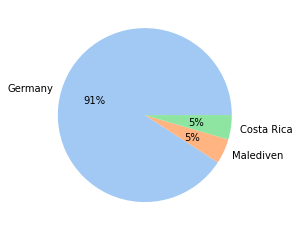

In [35]:
#Answer 1, visualisation
colors = sns.color_palette('pastel')[0:5]
plt.pie(top_Countries_values, labels = top_Countries_name, colors = colors, autopct='%.0f%%')
plt.show()

In [36]:
#Question 2

startdate = pd.to_datetime("2014-1-1").date()
enddate = pd.to_datetime("2020-12-31").date()
yearSales = {}
count = 0

for i in range(483):
  if (newDF['production_date'][i] >= startdate) & (newDF['production_date'][i] <= enddate):
    try:
      yearSales[newDF['production_date'][i].year] = yearSales[newDF['production_date'][i].year] + len(newDF['sales_code_array'][i].split(','))
    except:
      yearSales[newDF['production_date'][i].year] = len(newDF['sales_code_array'][i].split(','))
    count += len(newDF['sales_code_array'][i].split(','))
print(count)

57012


In [37]:
#variable
yearSales
top_years_name = yearSales.keys()
top_years_value = yearSales.values()

In [40]:
#Answer 2
#the year we sold the most vehicles overall
sort_orders_years = sorted(yearSales.items(), key=lambda x: x[1], reverse=True)
count =0;

max_count = 1;
for i in sort_orders_years:
	if count == max_count:
		break
	print(i[0], i[1])
	count += 1
 

2017 9810


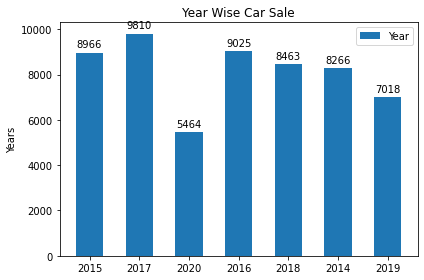

In [39]:
#Answer 2, visualisation with years between 2014-2020 with numbers

x = np.arange(len(yearSales.keys()))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , yearSales.values(), width, label='Year')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Years')
ax.set_title('Year Wise Car Sale')
ax.set_xticks(x)
ax.set_xticklabels(yearSales.keys())
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

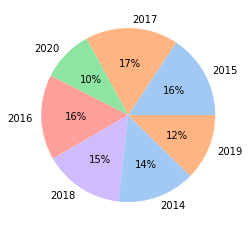

In [41]:
#Answer 2, visualisation with years between 2014-2020 with percentage

colors = sns.color_palette('pastel')[0:5]
plt.pie(yearSales.values(), labels = yearSales.keys(), colors = colors, autopct='%.0f%%')
plt.show()

In [42]:
#Question & Answer 3
#FIN of the first vehicle sold in terms of time
count =0;
max_count = 1;
for i,data in newDF.groupby('production_date'):
  if count == max_count:
    break
  print("Oldest Vehicle date")
  print(i)
  print("FIN of Oldest Vehicle Sold")
  dd = data['fin']
  print(data.fin)
  count += 1

Oldest Vehicle date
1850-08-25
FIN of Oldest Vehicle Sold
243    WEB91332184832372
Name: fin, dtype: object


In [43]:
dataframe_engines

,Code Group Id,Code Group Name En,Code Group Name De,Folder Name,Sales Code,Code Description En,Code Description De
0,131,powertrain engine series,motor baureihe,06 Powertrain,M0I,OM 924,OM 924
1,131,powertrain engine series,motor baureihe,06 Powertrain,M0J,OM 926,OM 926
2,131,powertrain engine series,motor baureihe,06 Powertrain,Z5A,M 936G,M 936G
3,131,powertrain engine series,motor baureihe,06 Powertrain,Z5B,OM 934,OM 934
4,131,powertrain engine series,motor baureihe,06 Powertrain,Z5C,OM 936,OM 936
5,131,powertrain engine series,motor baureihe,06 Powertrain,Z5D,OM 470,OM 470
6,131,powertrain engine series,motor baureihe,06 Powertrain,Z5E,OM 471,OM 471
7,131,powertrain engine series,motor baureihe,06 Powertrain,Z5F,OM 473,OM 473
8,131,powertrain engine series,motor baureihe,06 Powertrain,Z5L,OM 460,OM 460


In [45]:
#Question 4
#Finding sales code from the provided engine codes
selected_engines = ['OM 934', 'OM 936', 'OM 470', 'OM 471']
selected_sales_code = []
for i in range(9):
  if dataframe_engines['Code Description En'][i] in selected_engines:
    selected_sales_code.append(dataframe_engines['Sales Code'][i])
selected_sales_code

['Z5B', 'Z5C', 'Z5D', 'Z5E']

In [46]:
#Answer 4
#Vehicles were sold between 01/01/2017 and 01/01/2021 with OM934, OM936, OM470, and OM471 engines were sold
startdate = pd.to_datetime("2017-1-1").date()
enddate = pd.to_datetime("2021-1-1").date()
count = 0
results = {}
for i in range(483):
  if (newDF['production_date'][i] >= startdate) & (newDF['production_date'][i] <= enddate):
    for j in selected_sales_code:
      count += newDF['sales_code_array'][i].split(',').count(j) 
      try:
        results[j] += newDF['sales_code_array'][i].split(',').count(j) 
      except:
        results[j] = newDF['sales_code_array'][i].split(',').count(j) 
    
print("Total engines sold between 1.1.2017 to 1.1.2021 are:", count)
#print(results)

Total engines sold between 1.1.2017 to 1.1.2021 are: 108


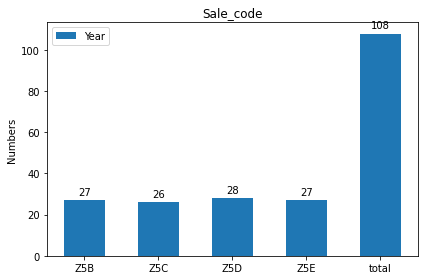

In [47]:
#Answer 4, visualisation with total and individual engine sold total

results['total'] = 108
x = np.arange(len(results.keys()))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , results.values(), width, label='Year')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Sale_code')
ax.set_xticks(x)
ax.set_xticklabels(results.keys())
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

In [49]:
#Question 5 
#Finding sels code for the provided engine
selected_engines = 'OM 936'
selected_sales_code 
for i in range(9):
  if dataframe_engines['Code Description En'][i] == selected_engines:
    selected_sales_code = dataframe_engines['Sales Code'][i]
    break
    
selected_sales_code

'Z5C'

In [50]:
#Answer 5
#FIN were sold between 01.01.2017 and 01.01.2021 and with OM936 engine sold to New Zealand

startdate = pd.to_datetime("2017-1-1").date()
enddate = pd.to_datetime("2021-1-1").date()
count = 0
results = []
country_name = 'Neuseeland'
for i in range(483):
  if (newDF['production_date'][i] >= startdate) & (newDF['production_date'][i] <= enddate):
    if newDF['country'][i] == country_name:
      if selected_sales_code in newDF['sales_code_array'][i].split(','):
        results.append(newDF['fin'][i])
      #count += newDF['sales_code_array'][i].split(',').count(j) 
    #  try:
   #     results[j] += newDF['sales_code_array'][i].split(',').count(j) 
  #    except:
 #       results[j] = newDF['sales_code_array'][i].split(',').count(j) 
    
print("FIN sold between 1.1.2017 and 1.1.2021 in Neuseeland are: ", results)
#print(results)

FIN sold between 1.1.2017 and 1.1.2021 in Neuseeland are:  ['NMB26186144147288']
